In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

Reading the given CSV Data file

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

Checking for data Types and null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
missing_values = df.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


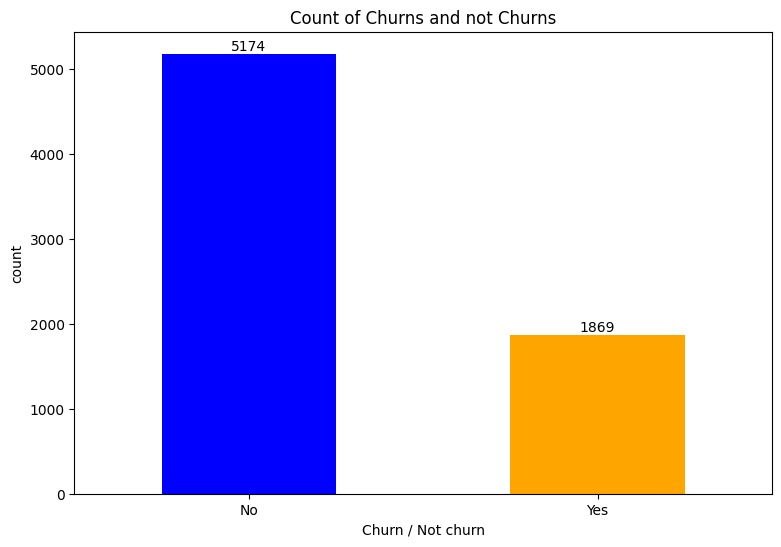

In [8]:
counts=df['Churn'].value_counts()
ax=counts.plot(kind='bar',color=['blue','orange'],figsize=(9,6))
plt.title('Count of Churns and not Churns')
plt.xlabel('Churn / Not churn')
plt.ylabel('count')
plt.xticks(rotation=0)
for i, v in enumerate(counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')  
plt.show()


We found 1869 customers churn as per give Data

In [9]:
counts

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
percentage = counts / counts.sum() * 100
result_df = pd.DataFrame({'Counts': counts, 'Percentage': percentage})
print(result_df)


       Counts  Percentage
Churn                    
No       5174   73.463013
Yes      1869   26.536987


Above is the number of customer churn and not Churn with their respective percentages

## Data Cleaning

In [11]:
new_df=df.copy()

In [12]:
new_df['TotalCharges']=pd.to_numeric(new_df['TotalCharges'],errors='coerce')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
missing = new_df.isnull().sum()
print(missing)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [14]:
temp=new_df[new_df['TotalCharges'].isnull()==True][['customerID','TotalCharges']]
temp

,customerID,TotalCharges
488,4472-LVYGI,NaN
753,3115-CZMZD,NaN
936,5709-LVOEQ,NaN
1082,4367-NUYAO,NaN
1340,1371-DWPAZ,NaN
3331,7644-OMVMY,NaN
3826,3213-VVOLG,NaN
4380,2520-SGTTA,NaN
5218,2923-ARZLG,NaN
6670,4075-WKNIU,NaN


Customers with no total charges 

In [15]:
print("Number of rows which have no Total Charges : ",temp.shape[0])

Number of rows which have no Total Charges :  11


In [16]:
new_df=new_df[new_df['TotalCharges'].isnull()!=True]  

Dropped the rows with no total charges

In [17]:
new_df.shape

(7032, 21)

In [18]:
new_df.duplicated().sum()

0

Checking for Duplicate Rows

In [19]:
create_label = lambda x: "{0} - {1}".format(x, x + 11)
new_df['tenure_group'] = new_df['tenure'].apply(lambda x: create_label((x - 1) // 12 * 12 + 1))

Made the tenure bins of size 12 months / 1 year as distinct value for tenure is high , making it categorical wil help analyzing better.

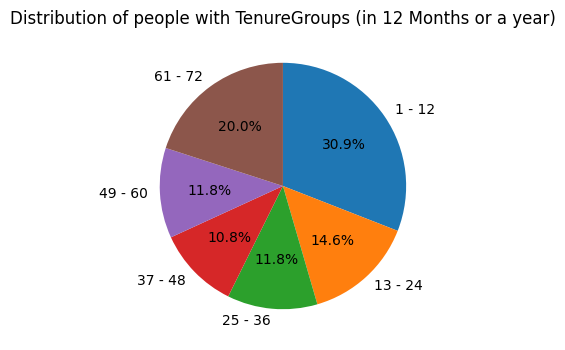

In [20]:
new_df['tenure_group'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', startangle=90,counterclock=False, figsize=(4,4))
plt.title("Distribution of people with TenureGroups (in 12 Months or a year)")
plt.ylabel("")
plt.show()

visualising the percentage of people distribution across different tenure bins

Here 30.9% of people have tenure ranges from 1 month to 12 months and 14.6% people have  tenure ranges from 13 months to 24 months and likewise.

<Axes: xlabel='tenure_group', ylabel='count'>

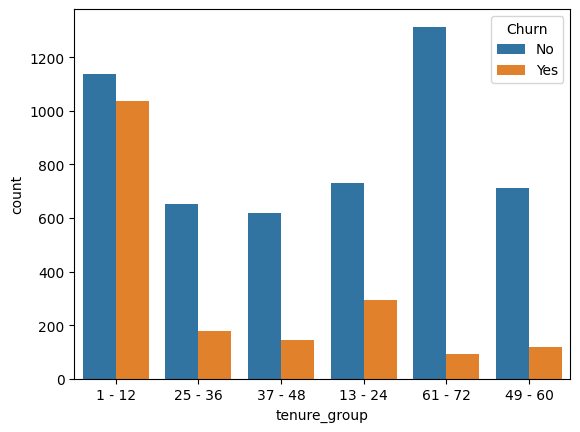

In [21]:
sn.countplot(data=new_df, x=new_df['tenure_group'], hue='Churn')

It can be observed from here that the customers of tenure group 1-12 churns more than other tenure groups

## Univariate, Bivariate and Multivariate Analysis

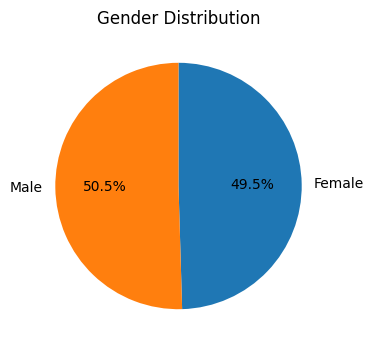

In [22]:
new_df['gender'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', startangle=90,counterclock=False, figsize=(4,4))
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

In given data distribution of male is more than female slightly

<Axes: xlabel='gender', ylabel='count'>

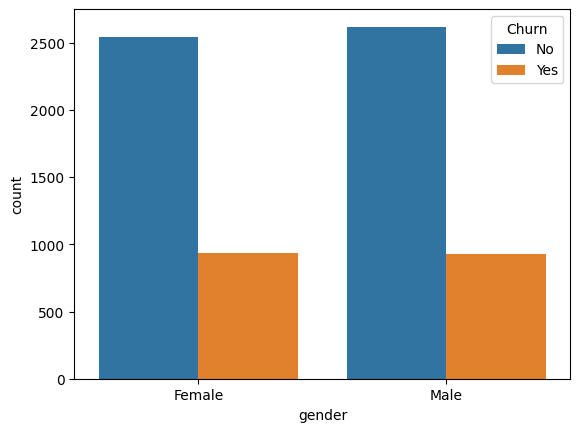

In [23]:
sn.countplot(data=new_df, x=new_df['gender'], hue='Churn')

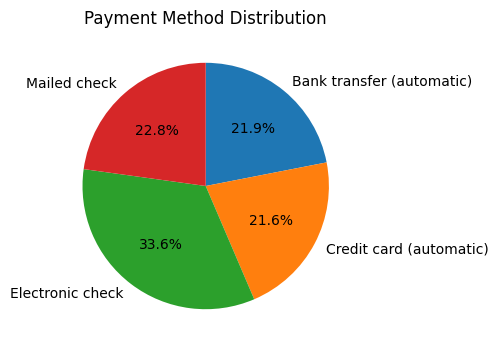

In [24]:
new_df['PaymentMethod'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', startangle=90,counterclock=False, figsize=(4,4))
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

<Axes: xlabel='PaymentMethod', ylabel='count'>

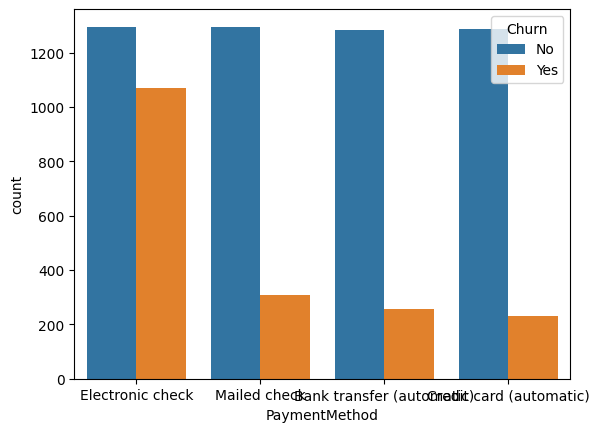

In [25]:
sn.countplot(data=new_df, x=new_df['PaymentMethod'], hue='Churn')

It is evident from here that customers who uses Electronic Check Payment Method churns more than customers with other payment methods

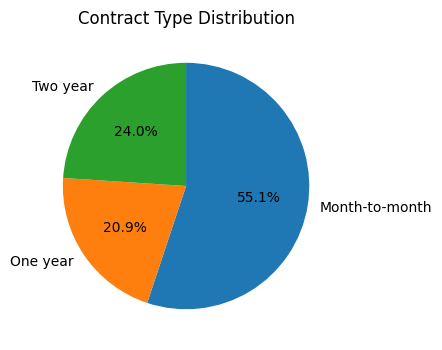

In [26]:
new_df['Contract'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', startangle=90,counterclock=False, figsize=(4,4))
plt.title("Contract Type Distribution")
plt.ylabel("")
plt.show()

<Axes: xlabel='Contract', ylabel='count'>

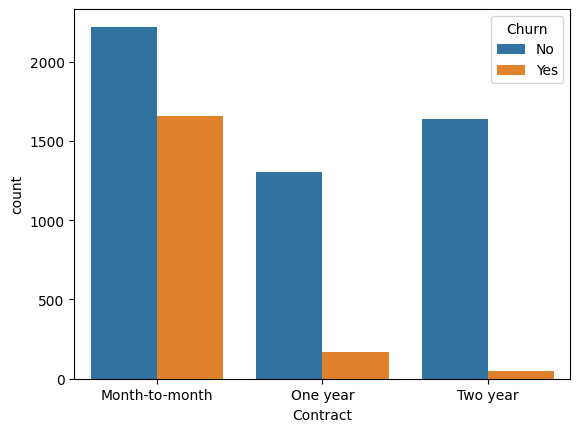

In [27]:
sn.countplot(data=new_df, x=new_df['Contract'], hue='Churn')

Observation from here is that the customers with month-to-month contract churns more than other contract types

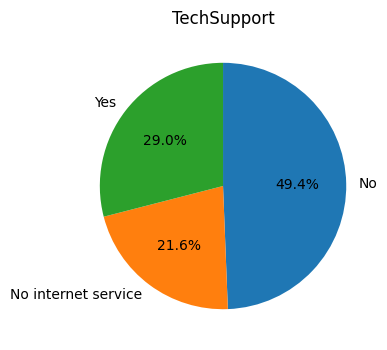

In [28]:
new_df['TechSupport'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', startangle=90,counterclock=False, figsize=(4,4))
plt.title("TechSupport")
plt.ylabel("")
plt.show()

<Axes: xlabel='TechSupport', ylabel='count'>

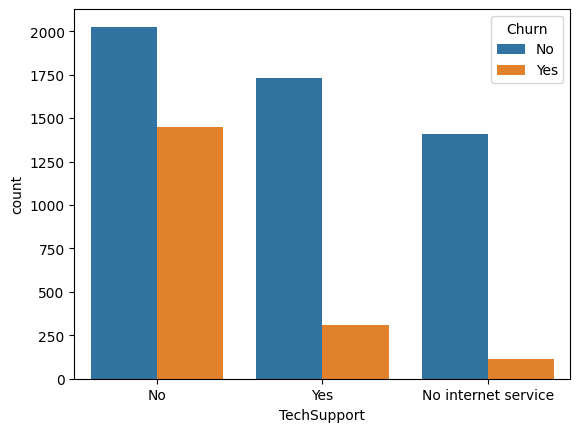

In [29]:
sn.countplot(data=new_df, x=new_df['TechSupport'], hue='Churn')

It can be seen through above graph is that the customer with no tech support churns more than others

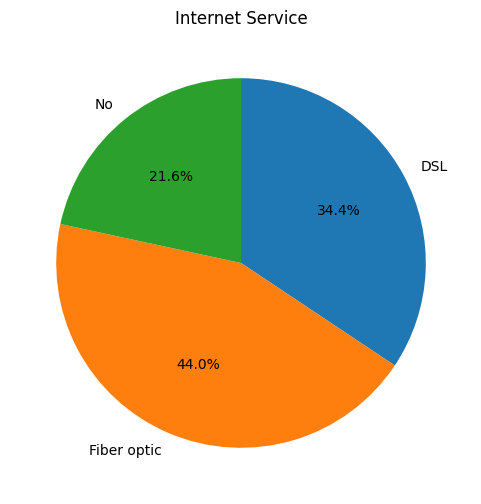

In [30]:
new_df['InternetService'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', startangle=90,counterclock=False, figsize=(6, 6))
plt.title("Internet Service")
plt.ylabel("")
plt.show()

<Axes: xlabel='InternetService', ylabel='count'>

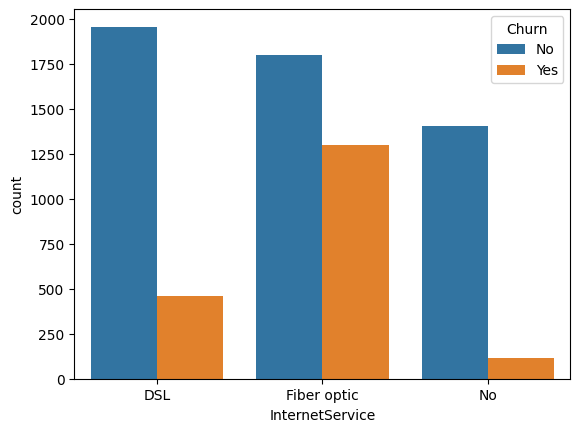

In [31]:
sn.countplot(data=new_df, x=new_df['InternetService'], hue='Churn')

Customers with Fiber obptic InternetService are more likely to churn than others

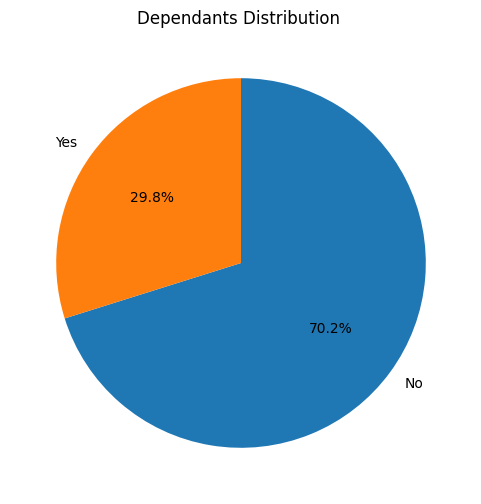

In [32]:
new_df['Dependents'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', startangle=90,counterclock=False, figsize=(6, 6))
plt.title("Dependants Distribution ")
plt.ylabel("")
plt.show()

<Axes: xlabel='Dependents', ylabel='count'>

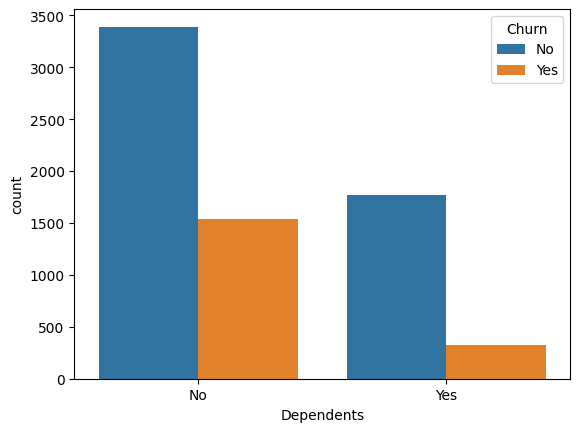

In [33]:
sn.countplot(data=new_df, x=new_df['Dependents'], hue='Churn')

Customers with no Dependents are more among churner than others

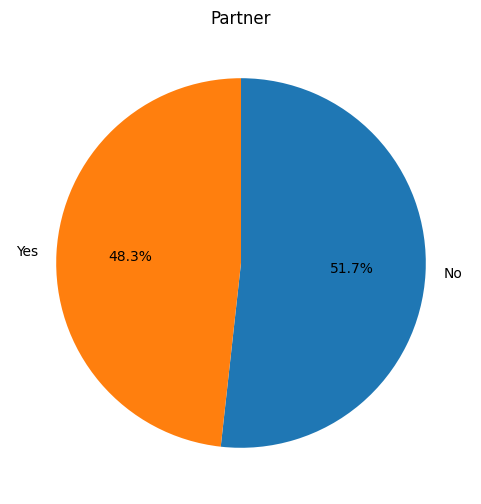

In [34]:
new_df['Partner'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', startangle=90,counterclock=False, figsize=(6, 6))
plt.title("Partner")
plt.ylabel("")
plt.show()

<Axes: xlabel='Partner', ylabel='count'>

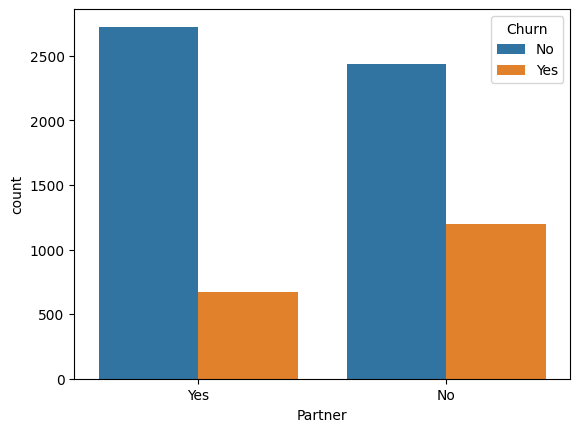

In [35]:
sn.countplot(data=new_df, x=new_df['Partner'], hue='Churn')

Customer with no partner churns more than the customer with partner

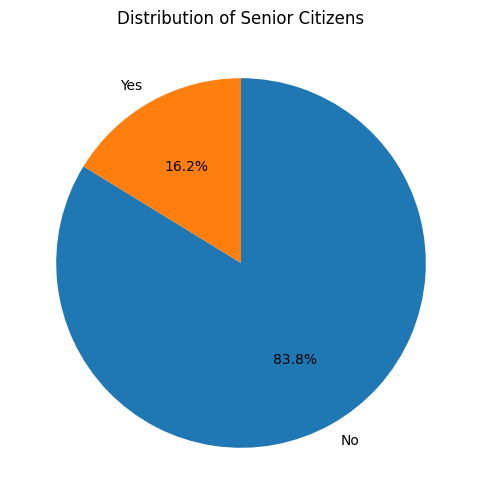

In [36]:
SeniorCitizen = new_df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
SeniorCitizen.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, figsize=(6, 6))
plt.title("Distribution of Senior Citizens")
plt.ylabel("")
plt.show()

<Axes: xlabel='SeniorCitizen', ylabel='count'>

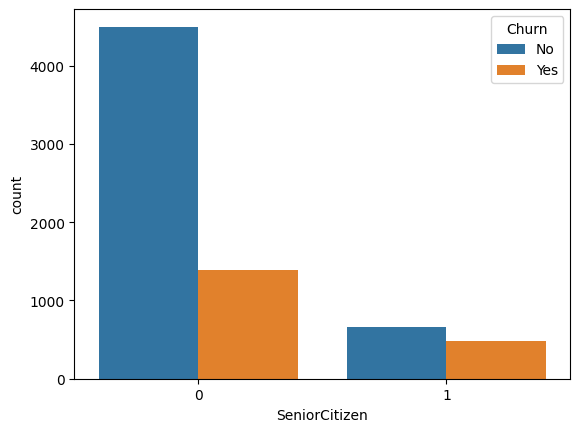

In [37]:
sn.countplot(data=new_df, x=new_df['SeniorCitizen'], hue='Churn')

In [38]:
new_df['Churn'] = new_df['Churn'].replace({ 'No':0, 'Yes':1})

In [39]:
new_df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [40]:
df_improved = pd.get_dummies(new_df)
df_improved.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


Performing one-hot Encoding as we have multiple ctegorical data columns

In [41]:
from ydata_profiling import ProfileReport
profile = ProfileReport(new_df,title='EDA using ydata-profiling')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Created a small report of the dataframe using the ydata library

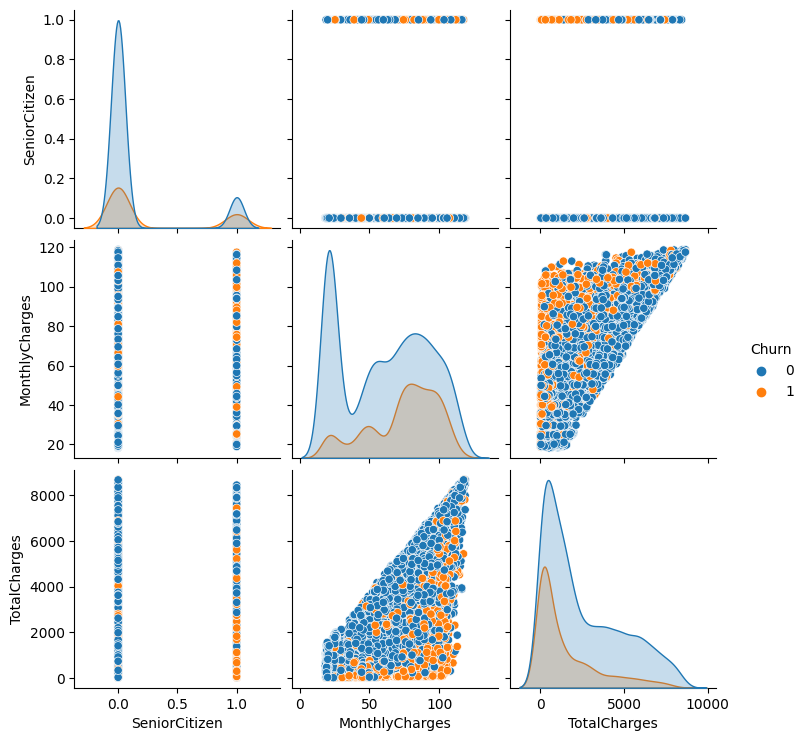

In [42]:
sn.pairplot(new_df, hue="Churn")

From above plot it can be observed that the customer churns more when the monthly charges are high. And total charges grow linearly with monthly charges

<Axes: >

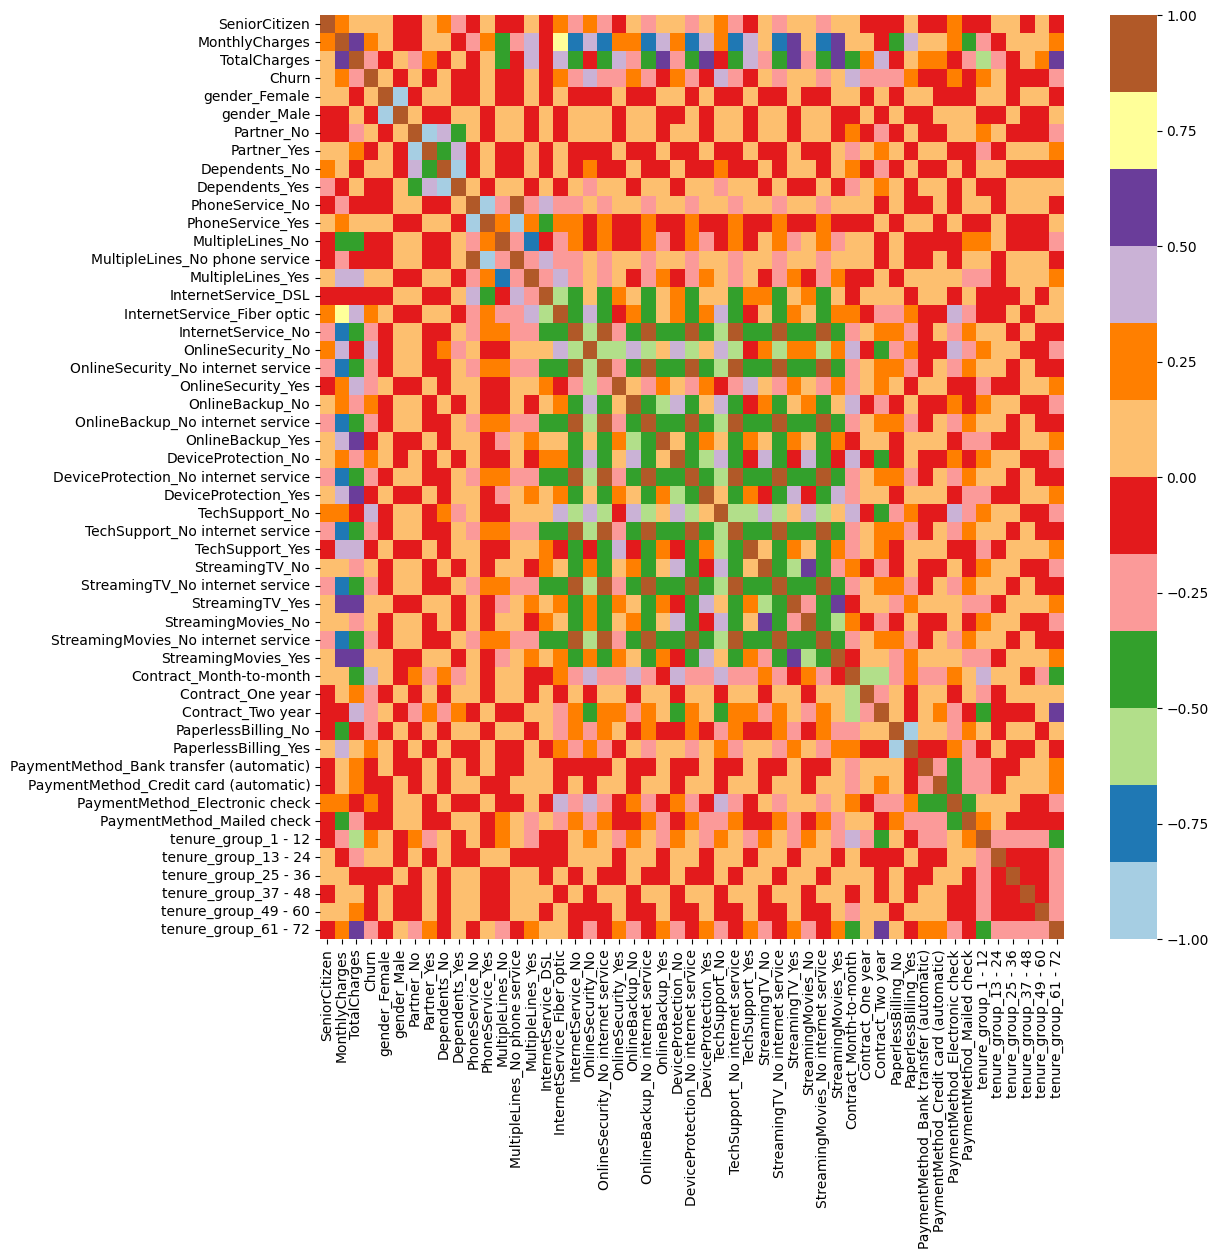

In [43]:
plt.figure(figsize=(12,12))
sn.heatmap(df_improved.corr(), cmap="Paired")

Text(0.5, 1.0, 'Distribution of gender with Partner for Churned Customers')

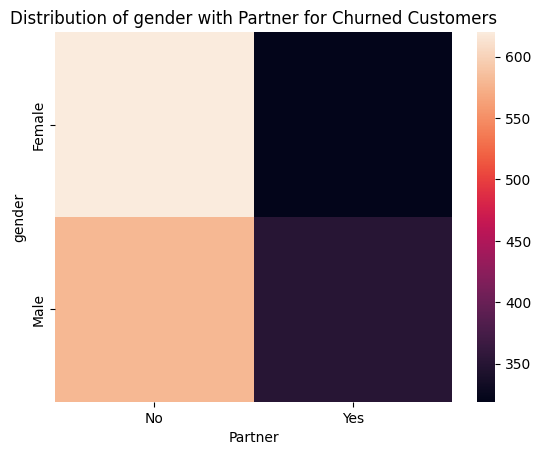

In [44]:
sn.heatmap(pd.crosstab(new_df[new_df['Churn']==1]['gender'],new_df[new_df['Churn']==1]['Partner']))
plt.title('Distribution of gender with Partner for Churned Customers')

From above plot it can be analysed that female are more likely to churn when there is no partner and when there is a partnr male churns more comparitively

Text(0.5, 1.0, 'Distribution of gender with Payment Method for Churned Customers')

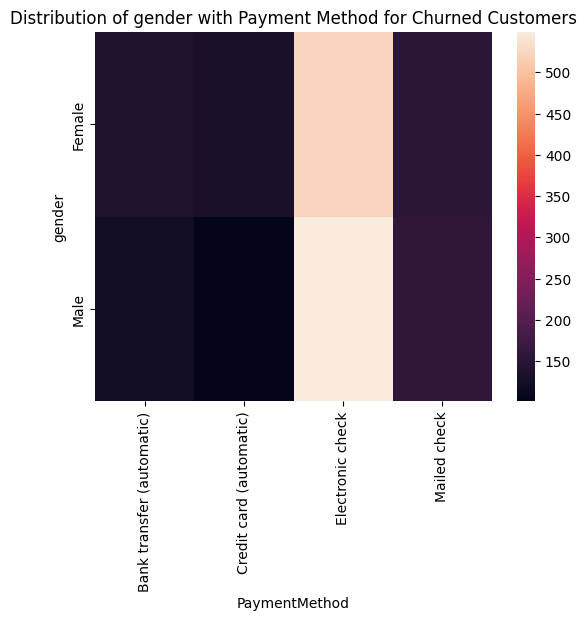

In [45]:
sn.heatmap(pd.crosstab(new_df[new_df['Churn']==1]['gender'],new_df[new_df['Churn']==1]['PaymentMethod']))
plt.title('Distribution of gender with Payment Method for Churned Customers')

Hera also we can analyse from plot that churners are more for electronic check payment method among them male are more likely to churn.

Text(0.5, 1.0, 'Distribution of gender with Tech Support for Churned Customers')

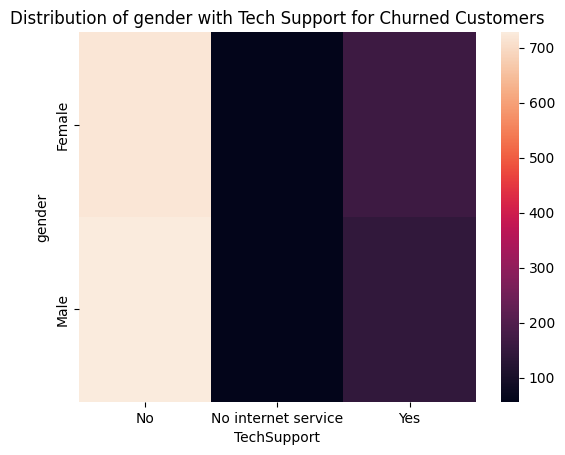

In [46]:
sn.heatmap(pd.crosstab(new_df[new_df['Churn']==1]['gender'],new_df[new_df['Churn']==1]['TechSupport']))
plt.title('Distribution of gender with Tech Support for Churned Customers')

customers with no tech support highly churns

Text(0.5, 1.0, 'Distribution of Senior Citizen with Tech Support for Churned Customers')

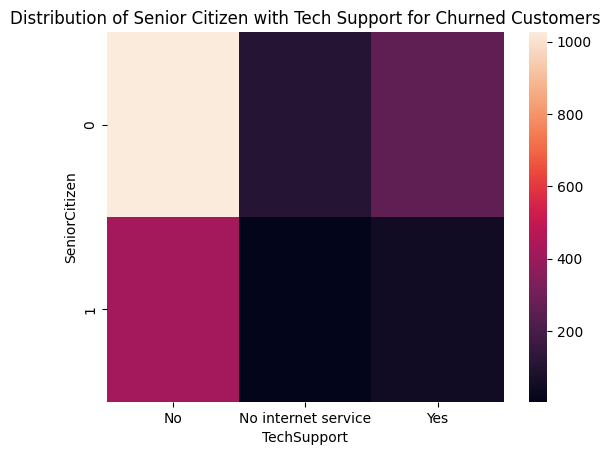

In [47]:
sn.heatmap(pd.crosstab(new_df[new_df['Churn']==1]['SeniorCitizen'],new_df[new_df['Churn']==1]['TechSupport']))
plt.title('Distribution of Senior Citizen with Tech Support for Churned Customers')

not senior citizen i.e. younger citizens churns more when there is no tech support

Text(0.5, 1.0, 'Distribution of gender with Contract for Churned Customers')

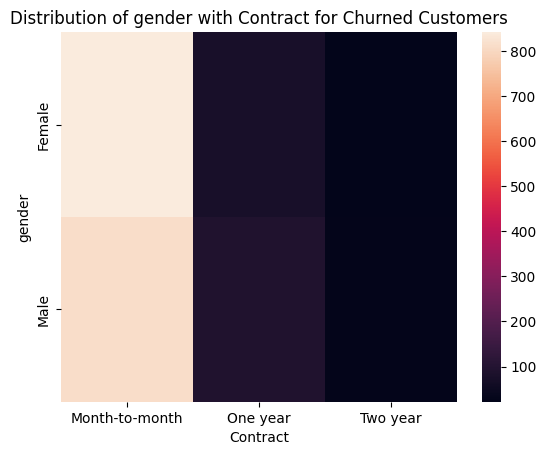

In [48]:
sn.heatmap(pd.crosstab(new_df[new_df['Churn']==1]['gender'],new_df[new_df['Churn']==1]['Contract']))
plt.title('Distribution of gender with Contract for Churned Customers')

Among the churners female churns more than male for month-to-month contract comparitively 

Text(0.5, 1.0, 'Distribution of Techsupport with Contract for Churned Customers')

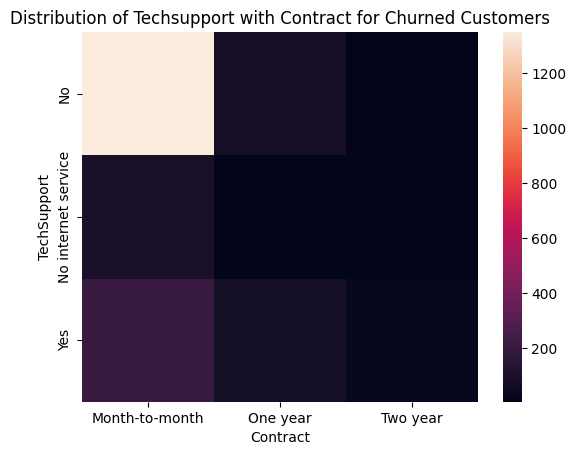

In [49]:
sn.heatmap(pd.crosstab(new_df[new_df['Churn']==1]['TechSupport'],new_df[new_df['Churn']==1]['Contract']))
plt.title('Distribution of Techsupport with Contract for Churned Customers')

Frequecy of churners are substantially higher when there is no tech support and the month-to-month contract 

Text(0.5, 1.0, 'Distribution of gender with Tenure group for Churned Customers')

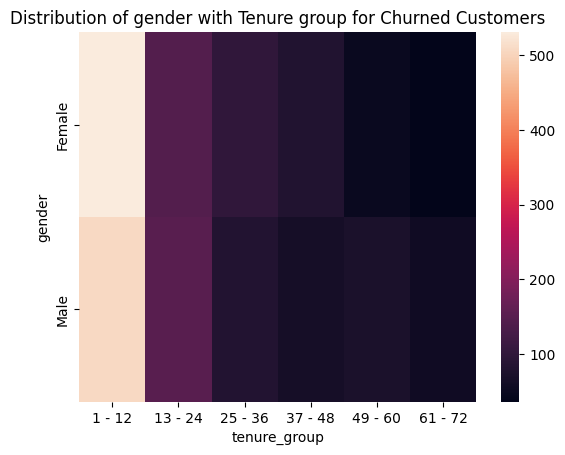

In [50]:
sn.heatmap(pd.crosstab(new_df[new_df['Churn']==1]['gender'],new_df[new_df['Churn']==1]['tenure_group']))
plt.title('Distribution of gender with Tenure group for Churned Customers')

Customers of tenure ranges from 1 to 12 likes to churn more , among them Female churns more  

<Axes: xlabel='tenure_group', ylabel='TotalCharges'>

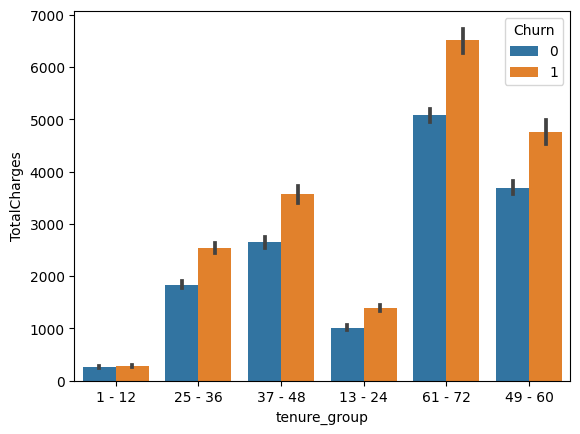

In [51]:
sn.barplot(x=new_df['tenure_group'],y=new_df['TotalCharges'],hue=new_df['Churn'])

It is evidient from the above plot that from all tenure groups when the total charges are higher customer are more likely to churn

And same pattern with the monthly charges

<Axes: xlabel='tenure_group', ylabel='MonthlyCharges'>

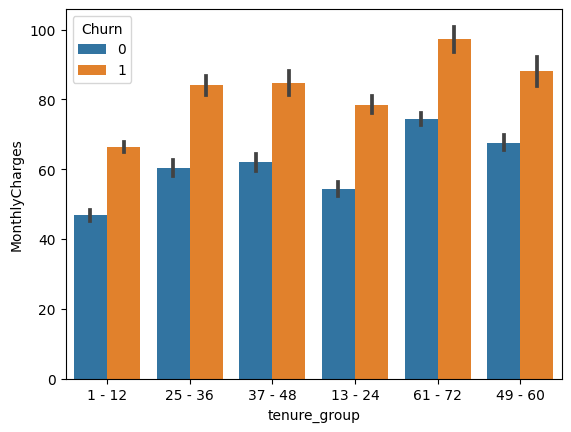

In [52]:
sn.barplot(x=new_df['tenure_group'],y=new_df['MonthlyCharges'],hue=new_df['Churn'])

In [53]:
new_df.to_csv('prepared_new_df.csv')

converting the modified dataframe to csv

In [54]:
df_improved.to_csv('prepared.csv')